In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
#Drop the society column as huge number of values are missing
df1 = df.drop('society' , axis='columns')
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
#check for 0 values
(df == 0).sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,1029
price,0


In [ ]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
#Convert size column into numerical
t = '2 BHK'
int(t.split(' ')[0])

2

In [ ]:
a = '2 bhk'
a[:2]

'2 '

In [ ]:
b = '10bhk'
b[:2]

'10'

In [ ]:
def size_bhk(t):
  if type(t) != float:
    return int(t.split(' ')[0])
  else:
    return 0

In [ ]:
size_bhk('4 Bedroom')

4

In [ ]:
abc = lambda x : x * 3
abc(67)

201

In [ ]:
df1['size'] = df1['size'].apply(size_bhk)

In [ ]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


In [ ]:
df1.isnull().sum()

,0
area_type,0
availability,0
location,1
size,0
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
(df1 == 0).sum()

,0
area_type,0
availability,0
location,0
size,16
total_sqft,0
bath,0
balcony,1029
price,0


In [ ]:
df1.dtypes

,0
area_type,object
availability,object
location,object
size,int64
total_sqft,object
bath,float64
balcony,float64
price,float64


In [ ]:
df[df['total_sqft'].str.contains('Sq. Meter')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.50
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,NaN,1000Sq. Meter,2.0,1.0,93.00
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,NaN,716Sq. Meter,9.0,1.0,296.00
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,CoiewSy,1500Sq. Meter,3.0,1.0,95.00
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,Sosisic,142.61Sq. Meter,3.0,1.0,115.00
3228,Built-up Area,Ready To Move,Dodda Banaswadi,5 Bedroom,NaN,3040Sq. Meter,5.0,1.0,140.00
4113,Super built-up Area,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
5631,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,204Sq. Meter,4.0,2.0,185.00
5976,Built-up Area,Ready To Move,1st Phase JP Nagar,1 BHK,Opamaan,78.03Sq. Meter,1.0,1.0,63.00
6303,Built-up Area,Ready To Move,JP Nagar,3 BHK,NaN,84.53Sq. Meter,3.0,1.0,69.34


In [ ]:
t = '2100 - 2400'
print(t.split('-'))
print(len(t.split('-')))
print((float(t.split('-')[0]) + float(t.split('-')[1]))/2)

['2100 ', ' 2400']
2
2250.0


In [ ]:
def fix_total_sqft(x):
  try:
    if len(x.split('-')) == 2:
      return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
    else:
      return float(x)
  except:
    return None

In [ ]:
#Converting data values into numerical form or null values
df1['total_sqft'].apply(fix_total_sqft)

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


In [ ]:
df1[df1['total_sqft'].apply(fix_total_sqft).isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.50
648,Built-up Area,Ready To Move,Arekere,9,4125Perch,9.0,NaN,265.00
775,Built-up Area,Ready To Move,Basavanagara,1,1000Sq. Meter,2.0,1.0,93.00
872,Super built-up Area,Ready To Move,Singapura Village,2,1100Sq. Yards,2.0,NaN,45.00
1019,Plot Area,18-Mar,Marathi Layout,1,5.31Acres,1.0,0.0,110.00
1086,Plot Area,19-Mar,Narasapura,2,30Acres,2.0,2.0,29.50
1400,Super built-up Area,Ready To Move,Chamrajpet,9,716Sq. Meter,9.0,1.0,296.00
1712,Plot Area,Ready To Move,Singena Agrahara,3,1500Sq. Meter,3.0,1.0,95.00
1743,Super built-up Area,19-Mar,Hosa Road,3,142.61Sq. Meter,3.0,1.0,115.00
1821,Plot Area,Ready To Move,Sarjapur,3,1574Sq. Yards,3.0,1.0,76.00


In [ ]:
#Update total_sqft data column with newly generated values after preprocessing
df1['total_sqft'] = df1['total_sqft'].apply(fix_total_sqft)

In [ ]:
#Check for the instances where null values were created because of exception while data type conversion
#use not operator to conver False into True and Vice-Versa to filter out sample where null values were created during conversion
df2 = df1[~df1['total_sqft'].isnull()]
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


In [ ]:
print(df1.shape)
print(df2.shape)

(13320, 8)
(13274, 8)


In [ ]:
df2.dtypes

,0
area_type,object
availability,object
location,object
size,int64
total_sqft,float64
bath,float64
balcony,float64
price,float64


In [ ]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


In [ ]:
#Can have only two categories in Area type
df2['area_type'].value_counts()

,count
area_type,
Super built-up Area,8779
Built-up Area,2402
Plot Area,2007
Carpet Area,86


In [ ]:
def fix_area_type(x):
  if x == 'Super built-up  Area':
    return x
  else:
    return 'Other Area Type'

In [ ]:
df2['area_type'] = df2['area_type'].apply(fix_area_type)

/tmp/ipython-input-1038625758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['area_type'] = df2['area_type'].apply(fix_area_type)


In [ ]:
df2['area_type'].value_counts()

,count
area_type,
Super built-up Area,8779
Other Area Type,4495


In [ ]:
#fix availability
df2['availability'].value_counts()

,count
availability,
Ready To Move,10542
18-Dec,306
18-May,294
18-Apr,271
18-Aug,199
...,...
16-Oct,1
17-Jan,1
16-Nov,1


In [ ]:
def fix_availability(x):
  if x == 'Ready To Move':
    return x
  else:
    return 'Under Construction'

In [ ]:
df2['availability'] = df2['availability'].apply(fix_availability)

/tmp/ipython-input-3724293298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['availability'] = df2['availability'].apply(fix_availability)


In [ ]:
df2['availability'].value_counts()

,count
availability,
Ready To Move,10542
Under Construction,2732


In [ ]:
#Location
len(df2['location'].unique())

1300

In [ ]:
#convert all info into lower cases
df2['location'] = df2['location'].str.lower()

#remove any leading or lagging spcaces
df2['location'] = df2['location'].str.strip()

/tmp/ipython-input-3424097908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].str.lower()
/tmp/ipython-input-3424097908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].str.strip()


In [ ]:
prop_count = df2['location'].value_counts()
prop_count

,count
location,
whitefield,539
sarjapur road,399
electronic city,304
kanakpura road,271
thanisandra,236
...,...
rahmath nagar,1
chikkanahalli,1
halanayakanahalli,1


In [ ]:
df2['location'] = df2['location'].str.replace(',','')

/tmp/ipython-input-2065635243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].str.replace(',','')


In [ ]:
df2['location'].nunique()

1269

In [ ]:
def remove_anamoly_location(x):
  if x in ['ananth nagar','anathanagar']:
    return 'anathanagar'
  elif x in ['ashwath nagar','ashwathnagar']:
    return 'ashwathnagar'
  elif x in ['t c palya', 't.c palya', 't.c. palya' ,'tc palaya' , 'tc.palya']:
    return 'tc palaya'
  elif x in ['whietfield','whitefield','whitefiled']:
    return 'whitefield'
  else:
    return x

In [ ]:
df2['location'] = df2['location'].apply(remove_anamoly_location)

/tmp/ipython-input-2996259133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].apply(remove_anamoly_location)


In [ ]:
df2['location'].nunique()

1261

In [ ]:
#to see all given locations
for key,group in df2.groupby('location'):
  print(key)

1 annasandrapalya
1 giri nagar
1 immadihalli
1 ramamurthy nagar
12th cross srinivas nagar banshankari 3rd stage
1a block koramangala
1channasandra
1hanuman nagar
1hoysalanagar
1kasavanhalli
1st block bel layout
1st block hbr layout
1st block hrbr layout
1st block jayanagar
1st block koramangala
1st phase jp nagar
1st stage domlur
1st stage indira nagar
1st stage radha krishna layout
2electronic city phase ii
2nd block bel layout
2nd block hbr layout
2nd block hrbr layout
2nd block jayanagar
2nd block koramangala
2nd phase jp nagar
2nd phase jp nagar jp nagar
2nd phase judicial layout
2nd stage arekere mico layout
2nd stage nagarbhavi
3rd block banashankari
3rd block hbr layout
3rd block hrbr layout
3rd block jayanagar
3rd block koramangala
3rd phase iti layout
3rd phase jp nagar
3rd stage raja rajeshwari nagar
4 bedroom farm house in bagalur
4th block hbr layout
4th block jayanagar
4th block koramangala
4th phase jp nagar
4th t block jayanagar
5th block hbr layout
5th block jayanagar
5

In [ ]:
prop_count = df2['location'].value_counts()
prop_count

,count
location,
whitefield,543
sarjapur road,399
electronic city,304
kanakpura road,271
thanisandra,236
...,...
ramanagara channapatna,1
maheswari nagar,1
t k reddy layout,1


In [ ]:
prop_count >= 30

,count
location,
whitefield,True
sarjapur road,True
electronic city,True
kanakpura road,True
thanisandra,True
...,...
ramanagara channapatna,False
maheswari nagar,False
t k reddy layout,False


In [ ]:
loc_count_more_30 = prop_count[prop_count >= 30]
loc_count_more_30

,count
location,
whitefield,543
sarjapur road,399
electronic city,304
kanakpura road,271
thanisandra,236
...,...
ambedkar nagar,31
anathanagar,31
doddathoguru,30


In [ ]:
'budigere' in loc_count_more_30

True

In [ ]:
'abshot layout' in loc_count_more_30

False

In [ ]:
'''
def fix_location(x):
  if x in loc_count_more_30:
    return x
  else:
    return 'Others'
'''


"\ndef fix_location(x):\n  if x in loc_count_more_30:\n    return x\n  else:\n    return 'Others'\n"

In [ ]:
def fix_location(x):
  return x in loc_count_more_30

In [ ]:
fix_location('budigere')

True

In [ ]:
df2['location'].apply(fix_location)

,location
0,True
1,False
2,True
3,False
4,True
...,...
13315,True
13316,False
13317,True
13318,False


In [ ]:
df3 = df2[df2['location'].apply(fix_location)]

In [ ]:
df3['location'].value_counts()

,count
location,
whitefield,543
sarjapur road,399
electronic city,304
kanakpura road,271
thanisandra,236
...,...
ambedkar nagar,31
anathanagar,31
doddathoguru,30


In [ ]:
len(df3['location'].unique())

100

In [ ]:
df3.describe()

,size,total_sqft,bath,balcony,price
count,7939.000000,7939.000000,7873.000000,7613.000000,7939.000000
mean,2.661166,1522.686702,2.572971,1.582688,100.126336
std,1.036287,962.095180,1.119188,0.793695,110.443924
min,0.000000,1.000000,1.000000,0.000000,8.000000
25%,2.000000,1110.000000,2.000000,1.000000,48.115000
50%,3.000000,1285.000000,2.000000,2.000000,69.500000
75%,3.000000,1664.000000,3.000000,2.000000,110.000000
max,12.000000,35000.000000,13.000000,3.000000,2200.000000


In [ ]:
df3.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,66
balcony,326
price,0


In [ ]:
df3 = df3.fillna(0)

#Remove Outliers

In [ ]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,electronic city phase ii,2,1056.0,2.0,1.0,39.07
2,Other Area Type,Ready To Move,uttarahalli,3,1440.0,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,kothanur,2,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,whitefield,2,1170.0,2.0,1.0,38.00
6,Super built-up Area,Under Construction,old airport road,4,2732.0,4.0,0.0,204.00


In [ ]:
df3.describe()

,size,total_sqft,bath,balcony,price
count,7939.000000,7939.000000,7939.000000,7939.000000,7939.000000
mean,2.661166,1522.686702,2.551581,1.517697,100.126336
std,1.036287,962.095180,1.138751,0.838289,110.443924
min,0.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1110.000000,2.000000,1.000000,48.115000
50%,3.000000,1285.000000,2.000000,2.000000,69.500000
75%,3.000000,1664.000000,3.000000,2.000000,110.000000
max,12.000000,35000.000000,13.000000,3.000000,2200.000000


In [ ]:
df3['size'].value_counts()

,count
size,
2,3478
3,3020
4,723
1,412
5,139
6,62
8,34
7,34
9,22


<Axes: >

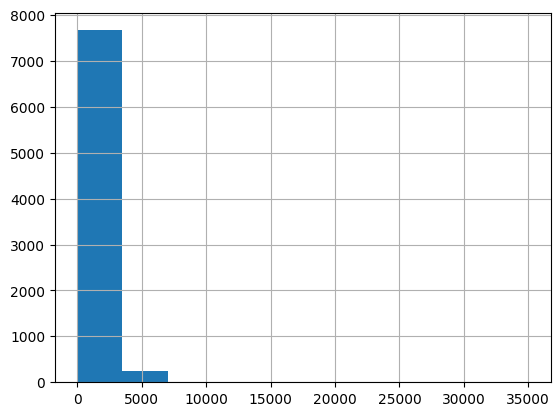

In [ ]:
df3['total_sqft'].hist()

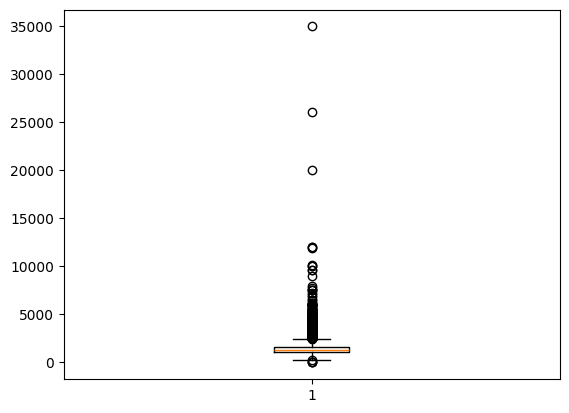

In [ ]:
plt.boxplot(df3['total_sqft'])

plt.show()

<Axes: >

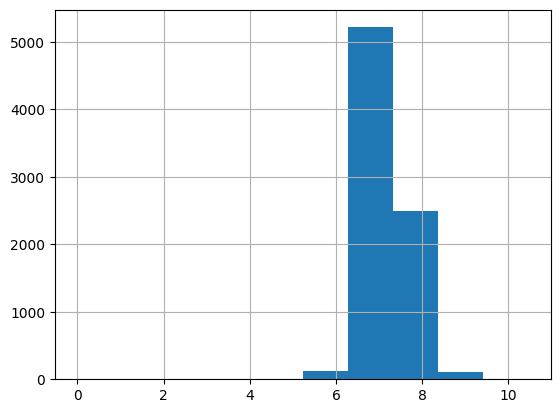

In [ ]:
from math import log
df3['total_sqft'].apply(log).hist()

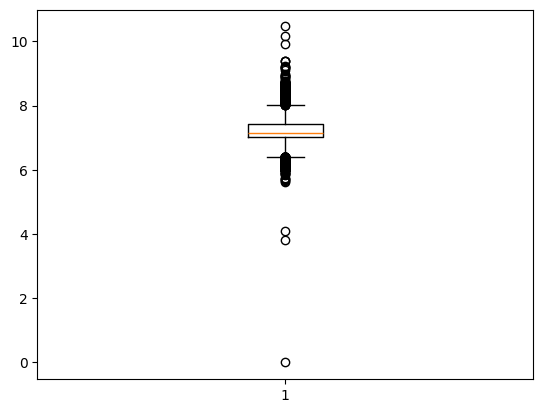

In [ ]:
plt.boxplot(df3['total_sqft'].apply(log))

plt.show()

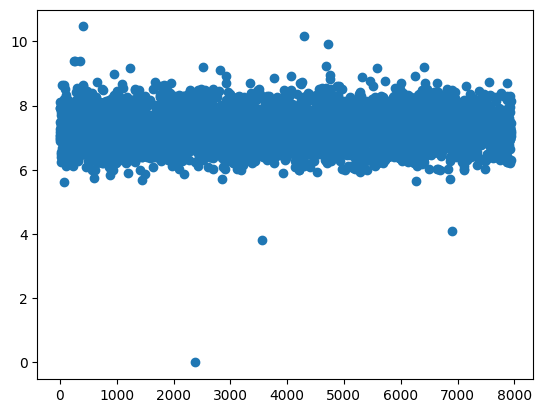

In [ ]:
plt.scatter(range(len(df3['location'])) , df3['total_sqft'].apply(log))
plt.show()

In [ ]:
df3['PPS'] = (df3['price']*100000)/df3['total_sqft']

In [ ]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Under Construction,electronic city phase ii,2,1056.0,2.0,1.0,39.07,3699.810606
2,Other Area Type,Ready To Move,uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
4,Super built-up Area,Ready To Move,kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,Ready To Move,whitefield,2,1170.0,2.0,1.0,38.00,3247.863248
6,Super built-up Area,Under Construction,old airport road,4,2732.0,4.0,0.0,204.00,7467.057101


In [ ]:
df3.describe()

,size,total_sqft,bath,balcony,price,PPS
count,7939.000000,7939.000000,7939.000000,7939.000000,7939.000000,7.939000e+03
mean,2.661166,1522.686702,2.551581,1.517697,100.126336,7.660989e+03
std,1.036287,962.095180,1.138751,0.838289,110.443924,1.347127e+05
min,0.000000,1.000000,0.000000,0.000000,8.000000,3.714286e+02
25%,2.000000,1110.000000,2.000000,1.000000,48.115000,4.206384e+03
50%,3.000000,1285.000000,2.000000,2.000000,69.500000,5.317726e+03
75%,3.000000,1664.000000,3.000000,2.000000,110.000000,6.811310e+03
max,12.000000,35000.000000,13.000000,3.000000,2200.000000,1.200000e+07


In [ ]:
df3['PPS'].values

array([3699.81060606, 4305.55555556, 4250.        , ..., 6689.83492615,
       5258.54513585, 3090.90909091])

In [ ]:
len(df3['PPS'].values)

7939

In [ ]:
range(len(df3))

range(0, 7939)

In [ ]:
from math import log
log(45)

3.8066624897703196

In [ ]:
def create_log(x):
  return log(x)

In [ ]:
df3['PPS'].apply(create_log)

,PPS
0,8.216037
2,8.367661
4,8.354674
5,8.085753
6,8.918256
...,...
13313,8.351827
13314,8.784256
13315,8.808344
13317,8.567610


<Axes: >

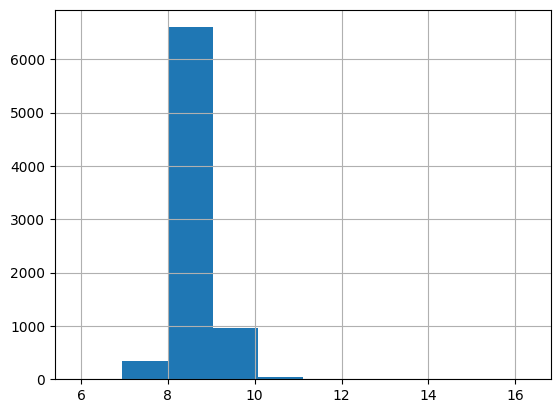

In [ ]:
df3['PPS'].apply(create_log).hist()

In [ ]:
for key,group in df3.groupby('location'):
  print(key,group['PPS'].mean())

5th phase jp nagar 6578.681948691307
7th phase jp nagar 6608.894450783368
8th phase jp nagar 6385.019507033486
9th phase jp nagar 6803.438950953265
akshaya nagar 5612.995244390355
ambedkar nagar 7447.72466192013
anathanagar 3577.7022937587603
anekal 3635.952564040287
attibele 3939.4091136721768
balagere 6111.56274008413
banashankari 7147.6696698785245
bannerghatta road 5917.3620583349875
basavangudi 11155.426537816496
begur road 4280.095636649704
bellandur 5920.43498469613
bhoganhalli 6287.5915932475045
bisuvanahalli 4047.860512961064
bommanahalli 4730.704021189399
bommasandra 4329.694209287903
brookefield 6907.977618540685
budigere 5155.500352808598
chandapura 3116.2950783555466
channasandra 4281.945267502524
chikkalasandra 5737.652496912934
cv raman nagar 5998.911882280543
devanahalli 5660.916648645433
doddathoguru 3913.220410589337
electronic city 4619.216886915809
electronic city phase ii 3888.986371898879
electronics city phase 1 4727.107761875177
frazer town 10335.889402184319
go

In [ ]:
df4 = pd.DataFrame()
for key,group in df3.groupby('location'):
  #print(key,group['PPS'].mean())

  m = group['PPS'].mean()
  s = group['PPS'].std()

  extracted_df = group[(group['PPS'] >= (m - 2*s)) & (group['PPS'] <= (m + 2*s))]
  df4 = pd.concat((df4,extracted_df) , ignore_index=True)

In [ ]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Ready To Move,5th phase jp nagar,2,1075.0,2.0,2.0,60.0,5581.395349
1,Other Area Type,Ready To Move,5th phase jp nagar,2,1150.0,3.0,3.0,52.5,4565.217391
2,Super built-up Area,Under Construction,5th phase jp nagar,2,1070.0,2.0,2.0,39.0,3644.859813
3,Other Area Type,Ready To Move,5th phase jp nagar,2,1256.0,2.0,1.0,62.8,5000.000000
4,Super built-up Area,Ready To Move,5th phase jp nagar,2,1207.0,2.0,2.0,63.0,5219.552610


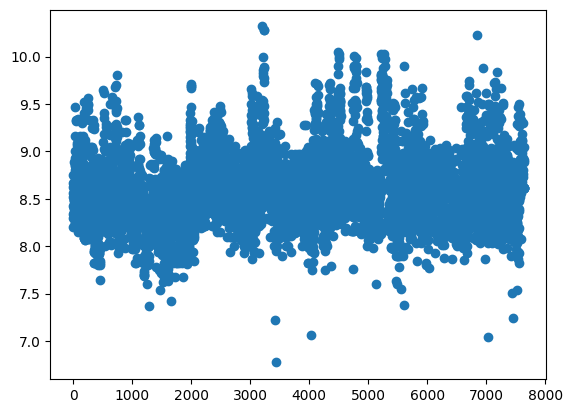

In [ ]:
plt.scatter(range(len(df4)) , df4['PPS'].apply(create_log))

plt.show()

<Axes: >

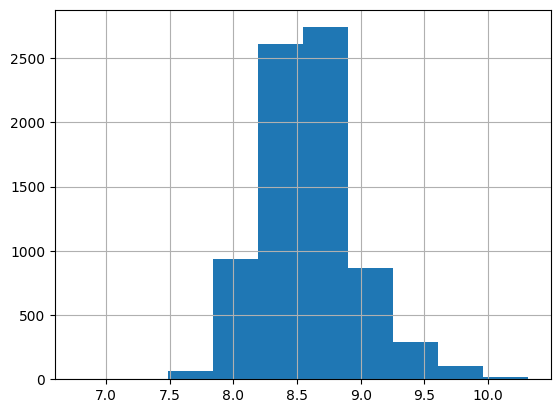

In [ ]:
df4['PPS'].apply(create_log).hist()

In [ ]:
df3.shape

(7939, 9)

In [ ]:
df4.shape

(7640, 9)

In [ ]:
df4.describe()

,size,total_sqft,bath,balcony,price,PPS
count,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000
mean,2.603403,1507.410709,2.490183,1.522513,94.271518,5786.280881
std,0.941704,825.969421,1.042321,0.828075,97.204595,2585.553495
min,0.000000,276.000000,0.000000,0.000000,8.000000,875.000000
25%,2.000000,1110.000000,2.000000,1.000000,48.000000,4189.012311
50%,2.000000,1282.500000,2.000000,2.000000,68.000000,5250.322317
75%,3.000000,1656.000000,3.000000,2.000000,105.000000,6631.928051
max,12.000000,20000.000000,12.000000,3.000000,2200.000000,30241.935484


In [ ]:
df4['PPS'].median()

5250.322317365021

In [ ]:
df4['PPS'].mean()

np.float64(5786.280880780495)

In [ ]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Ready To Move,5th phase jp nagar,2,1075.0,2.0,2.0,60.0,5581.395349
1,Other Area Type,Ready To Move,5th phase jp nagar,2,1150.0,3.0,3.0,52.5,4565.217391
2,Super built-up Area,Under Construction,5th phase jp nagar,2,1070.0,2.0,2.0,39.0,3644.859813
3,Other Area Type,Ready To Move,5th phase jp nagar,2,1256.0,2.0,1.0,62.8,5000.000000
4,Super built-up Area,Ready To Move,5th phase jp nagar,2,1207.0,2.0,2.0,63.0,5219.552610


In [ ]:
df5 = df4.drop('PPS' , axis='columns')

In [ ]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,5th phase jp nagar,2,1075.0,2.0,2.0,60.0
1,Other Area Type,Ready To Move,5th phase jp nagar,2,1150.0,3.0,3.0,52.5
2,Super built-up Area,Under Construction,5th phase jp nagar,2,1070.0,2.0,2.0,39.0
3,Other Area Type,Ready To Move,5th phase jp nagar,2,1256.0,2.0,1.0,62.8
4,Super built-up Area,Ready To Move,5th phase jp nagar,2,1207.0,2.0,2.0,63.0


In [ ]:
df5.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
(df5 == 0).sum()

,0
area_type,0
availability,0
location,0
size,7
total_sqft,0
bath,61
balcony,766
price,0


In [ ]:
df5.groupby('size')['total_sqft'].mean()

,total_sqft
size,
0,2632.357143
1,658.231830
2,1141.670864
3,1656.148133
4,2940.516065
5,2958.415865
6,2240.332619
7,3441.333333
8,2783.684211


In [ ]:
df5[df5['size'] == 0].describe()

,size,total_sqft,bath,balcony,price
count,7.0,7.000000,7.0,7.0,7.000000
mean,0.0,2632.357143,0.0,0.0,107.987857
std,0.0,1258.279471,0.0,0.0,139.302606
min,0.0,1800.000000,0.0,0.0,26.730000
25%,0.0,1800.000000,0.0,0.0,31.485000
50%,0.0,1950.000000,0.0,0.0,42.300000
75%,0.0,3038.250000,0.0,0.0,111.957500
max,0.0,5000.000000,0.0,0.0,400.000000


In [ ]:
def fix_zero_size(x):
  if x <= 2500:
    return 3
  elif (x > 2500) & (x <= 3500):
    return 4
  else:
    return 5

In [ ]:
dfs0 = df5[df5['size'] == 0]

dfs1 = df5[df5['size'] != 0]

In [ ]:
dfs0['size'] = dfs0['total_sqft'].apply(fix_zero_size)

/tmp/ipython-input-191139697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs0['size'] = dfs0['total_sqft'].apply(fix_zero_size)


In [ ]:
df6 = pd.concat((dfs0,dfs1) , ignore_index=True)
df6.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Other Area Type,Under Construction,devanahalli,3,1950.0,0.0,0.0,46.800
1,Other Area Type,Under Construction,devanahalli,5,3752.5,0.0,0.0,177.115
2,Other Area Type,Under Construction,kasavanhalli,5,5000.0,0.0,0.0,400.000
3,Other Area Type,Under Construction,mysore road,3,1800.0,0.0,0.0,42.300
4,Other Area Type,Under Construction,sarjapur road,3,1800.0,0.0,0.0,34.185


In [ ]:
df6['size'].value_counts()

,count
size,
2,3445
3,2972
4,620
1,399
5,106
6,42
7,21
8,19
9,13


In [ ]:
#function to identify data samples with 8,9,10 0r 12 bhk
def remove_size_outliers(x):
  return x in [8,9,10,12]

In [ ]:
remove_size_outliers(1)

False

In [ ]:
#Filter out if size is 8,9,10 or 12
df7 = df6[~df6['size'].apply(remove_size_outliers)]
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Other Area Type,Under Construction,devanahalli,3,1950.0,0.0,0.0,46.800
1,Other Area Type,Under Construction,devanahalli,5,3752.5,0.0,0.0,177.115
2,Other Area Type,Under Construction,kasavanhalli,5,5000.0,0.0,0.0,400.000
3,Other Area Type,Under Construction,mysore road,3,1800.0,0.0,0.0,42.300
4,Other Area Type,Under Construction,sarjapur road,3,1800.0,0.0,0.0,34.185


In [ ]:
df7['bath'].value_counts()

,count
bath,
2.0,4290
3.0,1910
4.0,568
1.0,465
5.0,201
6.0,84
0.0,61
7.0,23
8.0,3


In [ ]:
dfb0 = df7[df7['bath'] == 0]     #with bath is 0
dfb1 = df7[df7['bath'] != 0]     #with bath non zero

In [ ]:
dfb0['bath'] = dfb0['size'] + 1

/tmp/ipython-input-3653008905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb0['bath'] = dfb0['size'] + 1


In [ ]:
df8 = pd.concat((dfb0,dfb1) , ignore_index=True)
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Other Area Type,Under Construction,devanahalli,3,1950.0,4.0,0.0,46.800
1,Other Area Type,Under Construction,devanahalli,5,3752.5,6.0,0.0,177.115
2,Other Area Type,Under Construction,kasavanhalli,5,5000.0,6.0,0.0,400.000
3,Other Area Type,Under Construction,mysore road,3,1800.0,4.0,0.0,42.300
4,Other Area Type,Under Construction,sarjapur road,3,1800.0,4.0,0.0,34.185


In [ ]:
df8[df8['balcony'] == 0]

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Other Area Type,Under Construction,devanahalli,3,1950.0,4.0,0.0,46.800
1,Other Area Type,Under Construction,devanahalli,5,3752.5,6.0,0.0,177.115
2,Other Area Type,Under Construction,kasavanhalli,5,5000.0,6.0,0.0,400.000
3,Other Area Type,Under Construction,mysore road,3,1800.0,4.0,0.0,42.300
4,Other Area Type,Under Construction,sarjapur road,3,1800.0,4.0,0.0,34.185
...,...,...,...,...,...,...,...,...
7580,Super built-up Area,Ready To Move,yeshwanthpur,1,994.0,2.0,0.0,54.670
7581,Other Area Type,Ready To Move,yeshwanthpur,1,650.0,1.0,0.0,40.000
7588,Super built-up Area,Ready To Move,yeshwanthpur,3,1677.0,3.0,0.0,92.130
7600,Super built-up Area,Ready To Move,yeshwanthpur,3,1676.0,3.0,0.0,92.130


In [ ]:
df8.groupby('size')['balcony'].max()

,balcony
size,
1,2.0
2,3.0
3,3.0
4,3.0
5,3.0
6,3.0
7,3.0


In [ ]:
df8.groupby('size')['balcony'].median()

,balcony
size,
1,1.0
2,1.0
3,2.0
4,2.0
5,1.0
6,2.0
7,2.0


In [ ]:
#will return 1 if numbers of bedroom is 1,2 or 5 else it will return 2
def fix_zero_balcony(x):
  if x in [1,2,5]:
    return 1
  else:
    return 2

In [ ]:
dfbl0 = df8[df8['balcony'] == 0]        #data where balcony is 0
dfbl1 = df8[df8['balcony'] != 0]        #data where balcony is non-zero

In [ ]:
dfbl0['balcony'] = dfbl0['size'].apply(fix_zero_balcony)

/tmp/ipython-input-2320722528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbl0['balcony'] = dfbl0['size'].apply(fix_zero_balcony)


In [ ]:
df9 = pd.concat((dfbl0,dfbl1) , ignore_index=True)
df9.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Other Area Type,Under Construction,devanahalli,3,1950.0,4.0,2.0,46.800
1,Other Area Type,Under Construction,devanahalli,5,3752.5,6.0,1.0,177.115
2,Other Area Type,Under Construction,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,Other Area Type,Under Construction,mysore road,3,1800.0,4.0,2.0,42.300
4,Other Area Type,Under Construction,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
(df9 == 0).sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df10 = df9.copy()
df10.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Other Area Type,Under Construction,devanahalli,3,1950.0,4.0,2.0,46.800
1,Other Area Type,Under Construction,devanahalli,5,3752.5,6.0,1.0,177.115
2,Other Area Type,Under Construction,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,Other Area Type,Under Construction,mysore road,3,1800.0,4.0,2.0,42.300
4,Other Area Type,Under Construction,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
df10['area_type'].unique()

array(['Other Area Type', 'Super built-up  Area'], dtype=object)

In [ ]:
df10['area_type'] = df10['area_type'].map({'Other Area Type':0, 'Super built-up  Area':1})  #mapping to generate binary column
df10.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,Under Construction,devanahalli,3,1950.0,4.0,2.0,46.800
1,0,Under Construction,devanahalli,5,3752.5,6.0,1.0,177.115
2,0,Under Construction,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,0,Under Construction,mysore road,3,1800.0,4.0,2.0,42.300
4,0,Under Construction,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
df10['availability'].unique()

array(['Under Construction', 'Ready To Move'], dtype=object)

In [ ]:
df10['availability'] = df10['availability'].map({'Under Construction' :0 , 'Ready To Move' : 1})

In [ ]:
df10.head()


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,Under Construction,devanahalli,3,1950.0,4.0,2.0,46.800
1,0,Under Construction,devanahalli,5,3752.5,6.0,1.0,177.115
2,0,Under Construction,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,0,Under Construction,mysore road,3,1800.0,4.0,2.0,42.300
4,0,Under Construction,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
#package of library scikit learn for label encoding
#pip install scikit-learn

from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [ ]:
df10['location'].unique()

array(['devanahalli', 'kasavanhalli', 'mysore road', 'sarjapur  road',
       'whitefield', 'bhoganhalli', 'bommanahalli', 'chandapura',
       'electronic city phase ii', 'electronics city phase 1',
       'haralur road', 'hebbal', 'hennur', 'hennur road', 'jakkur',
       'jigani', 'jp nagar', 'kanakpura road', 'kr puram', 'kudlu gate',
       'malleshwaram', 'old madras road', 'rajaji nagar', 'sarjapur',
       'thanisandra', 'yelahanka', '5th phase jp nagar',
       '7th phase jp nagar', '8th phase jp nagar', '9th phase jp nagar',
       'akshaya nagar', 'anekal', 'attibele', 'balagere', 'banashankari',
       'bannerghatta road', 'basavangudi', 'begur road', 'bellandur',
       'bisuvanahalli', 'bommasandra', 'brookefield', 'budigere',
       'channasandra', 'chikkalasandra', 'cv raman nagar', 'doddathoguru',
       'electronic city', 'frazer town', 'gottigere', 'green glen layout',
       'harlur', 'hebbal kempapura', 'hegde nagar', 'hoodi',
       'horamavu agara', 'hormavu', 'h

In [ ]:
#Continous Encoding
enc.fit(df10['location'])
encoded_value = enc.transform(df10['location'])
encoded_value

array([25, 25, 58, ..., 99, 99, 99])

In [ ]:
df11 = df10.copy()
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,0,devanahalli,3,1950.0,4.0,2.0,46.800
1,0,0,devanahalli,5,3752.5,6.0,1.0,177.115
2,0,0,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,0,0,mysore road,3,1800.0,4.0,2.0,42.300
4,0,0,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
df11['location'] = encoded_value
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,0,25,3,1950.0,4.0,2.0,46.800
1,0,0,25,5,3752.5,6.0,1.0,177.115
2,0,0,58,5,5000.0,6.0,1.0,400.000
3,0,0,71,3,1800.0,4.0,2.0,42.300
4,0,0,84,3,1800.0,4.0,2.0,34.185


In [ ]:
X = df11.drop('price' , axis='columns')
Y = df11['price']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

ytrain_pred = lmodel.predict(xtrain)
ytest_pred = lmodel.predict(xtest)

mse_train = ((ytrain - ytrain_pred)**2).mean()
mse_test = ((ytest - ytest_pred)**2).mean()

print(mse_train , mse_test)

3637.2030391171143 2135.771815907662


#DATA SCALING


In [ ]:
X = df11.drop('price' , axis='columns')
Y = df11['price']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(xtrain)

xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [ ]:
pd.DataFrame(xtrain_scaled).head()

,0,1,2,3,4,5,6
0,0.559056,0.596861,0.953338,0.518001,0.375576,0.537397,1.965191
1,0.559056,0.596861,-0.543648,1.724272,1.210220,1.593487,0.477604
2,-1.788731,0.596861,1.019871,-0.688271,-0.490609,-0.518693,-1.009984
3,0.559056,0.596861,1.086404,-0.688271,-0.387491,-0.518693,0.477604
4,0.559056,-1.675433,0.653941,-0.688271,-0.371721,-0.518693,-1.009984


In [ ]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain_scaled,ytrain)

ytrain_pred = lmodel.predict(xtrain_scaled)
ytest_pred = lmodel.predict(xtest_scaled)

mse_train = ((ytrain - ytrain_pred)**2).mean()
mse_test = ((ytest - ytest_pred)**2).mean()

print(mse_train , mse_test)

mae_train = (abs(ytrain - ytrain_pred)).mean()
mae_test = (abs(ytest - ytest_pred)).mean()

print(mae_train , mae_test)

3301.66500175905 3153.929581293897
26.562242426152174 28.11738024139926


#DATA NORMALISING

In [ ]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,0,25,3,1950.0,4.0,2.0,46.800
1,0,0,25,5,3752.5,6.0,1.0,177.115
2,0,0,58,5,5000.0,6.0,1.0,400.000
3,0,0,71,3,1800.0,4.0,2.0,42.300
4,0,0,84,3,1800.0,4.0,2.0,34.185


In [ ]:
df12 = df11.copy()
df12.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,0,25,3,1950.0,4.0,2.0,46.800
1,0,0,25,5,3752.5,6.0,1.0,177.115
2,0,0,58,5,5000.0,6.0,1.0,400.000
3,0,0,71,3,1800.0,4.0,2.0,42.300
4,0,0,84,3,1800.0,4.0,2.0,34.185


In [ ]:
df12['location'] = df12['location']/df12['location'].max()
df12['total_sqft'] = df12['total_sqft']/df12['total_sqft'].max()
df12['size'] = df12['size']/df12['size'].max()
df12['bath'] = df12['bath']/df12['bath'].max()
df12['balcony'] = df12['balcony']/df12['balcony'].max()

In [ ]:
df12.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,0,0.252525,0.428571,0.097500,0.50,0.666667,46.800
1,0,0,0.252525,0.714286,0.187625,0.75,0.333333,177.115
2,0,0,0.585859,0.714286,0.250000,0.75,0.333333,400.000
3,0,0,0.717172,0.428571,0.090000,0.50,0.666667,42.300
4,0,0,0.848485,0.428571,0.090000,0.50,0.666667,34.185


In [ ]:
X = df12.drop('price' , axis='columns')
Y = df12['price']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

ytrain_pred = lmodel.predict(xtrain)
ytest_pred = lmodel.predict(xtest)

mse_train = ((ytrain - ytrain_pred)**2).mean()
mse_test = ((ytest - ytest_pred)**2).mean()

print(mse_train , mse_test)

mae_train = (abs(ytrain - ytrain_pred)).mean()
mae_test = (abs(ytest - ytest_pred)).mean()

print(mae_train , mae_test)

3501.7959755168977 2550.649016302636
27.84118328159031 25.754407831654024


In [ ]:
import numpy as np
np.unique(encoded_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

#Binary Encoding of Categorical Columns

In [ ]:
df13 = df10.copy()
df13.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,0,devanahalli,3,1950.0,4.0,2.0,46.800
1,0,0,devanahalli,5,3752.5,6.0,1.0,177.115
2,0,0,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,0,0,mysore road,3,1800.0,4.0,2.0,42.300
4,0,0,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
#df13['area_type'] = df13['area_type'].str.lower()
#df13['availability'] = df13['availability'].str.lower()

In [ ]:
#Binary Encoding
#bin_encoded_area = pd.get_dummies(df13['area_type'])
#bin_encoded_avail = pd.get_dummies(df13['availability'])
bin_encoded_loc = pd.get_dummies(df13['location'])

In [ ]:
df14 = pd.concat((df13,bin_encoded_loc) , axis='columns')
df14.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,5th phase jp nagar,7th phase jp nagar,...,tumkur road,uttarahalli,varthur,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelahanka,yelahanka new town,yeshwanthpur
0,0,0,devanahalli,3,1950.0,4.0,2.0,46.800,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,devanahalli,5,3752.5,6.0,1.0,177.115,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,kasavanhalli,5,5000.0,6.0,1.0,400.000,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,mysore road,3,1800.0,4.0,2.0,42.300,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,sarjapur road,3,1800.0,4.0,2.0,34.185,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df14 = df14.drop(['location'] , axis='columns')
df14.head()

,area_type,availability,size,total_sqft,bath,balcony,price,5th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,tumkur road,uttarahalli,varthur,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelahanka,yelahanka new town,yeshwanthpur
0,0,0,3,1950.0,4.0,2.0,46.800,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,5,3752.5,6.0,1.0,177.115,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,5,5000.0,6.0,1.0,400.000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,3,1800.0,4.0,2.0,42.300,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3,1800.0,4.0,2.0,34.185,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df14.drop('price' , axis='columns')
Y = df14['price']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=0)

from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

ytrain_pred = lmodel.predict(xtrain)
ytest_pred = lmodel.predict(xtest)

mse_train = ((ytrain - ytrain_pred)**2).mean()
mse_test = ((ytest - ytest_pred)**2).mean()

print(mse_train , mse_test)

mae_train = (abs(ytrain - ytrain_pred)).mean()
mae_test = (abs(ytest - ytest_pred)).mean()

print(mae_train , mae_test)

2867.8936787428825 1310.0672324554514
23.831404924028558 22.546411499154814


In [ ]:
lmodel.coef_

array([-4.99350113e+00, -2.23613694e+00, -2.18493456e+00,  8.51865620e-02,
        1.00433674e+01, -5.15223121e+00, -5.08577537e+00,  4.28993930e+00,
       -1.14236101e+01, -7.81826637e+00, -1.79296863e+01,  1.98915730e+00,
       -1.58834680e+01, -1.48887618e+01, -1.31636976e+01,  7.80859931e+00,
        2.65572982e+00, -1.62494763e+01,  6.26849423e+01, -2.59292574e+01,
       -8.67597465e+00, -1.08214021e+01, -1.30957496e+01, -2.01210335e+01,
       -2.09214296e+01, -3.57393405e+00, -1.52509698e+01, -2.07957504e+01,
       -2.65475378e+01, -1.35624671e+01,  1.54386952e+00, -9.57374239e+00,
       -1.80672600e+01, -1.38774923e+01, -2.79892593e+01, -8.79582241e+00,
        6.95752000e+01, -2.53485908e+01, -3.11780259e+00, -1.47282578e+01,
       -6.11852579e-01,  1.18718074e+01,  4.38746230e+01, -4.15822133e+00,
       -1.77819031e+01, -8.37467747e+00, -7.43677409e+00, -1.79304694e+01,
       -1.51208539e+01, -1.20511736e+01,  3.01857270e+01, -1.04179025e+01,
       -2.92502549e+00,  

In [ ]:
xtrain.columns

Index(['area_type', 'availability', 'size', 'total_sqft', 'bath', 'balcony',
       '5th phase jp nagar', '7th phase jp nagar', '8th phase jp nagar',
       '9th phase jp nagar',
       ...
       'tumkur road', 'uttarahalli', 'varthur', 'vidyaranyapura',
       'vijayanagar', 'vittasandra', 'whitefield', 'yelahanka',
       'yelahanka new town', 'yeshwanthpur'],
      dtype='object', length=106)

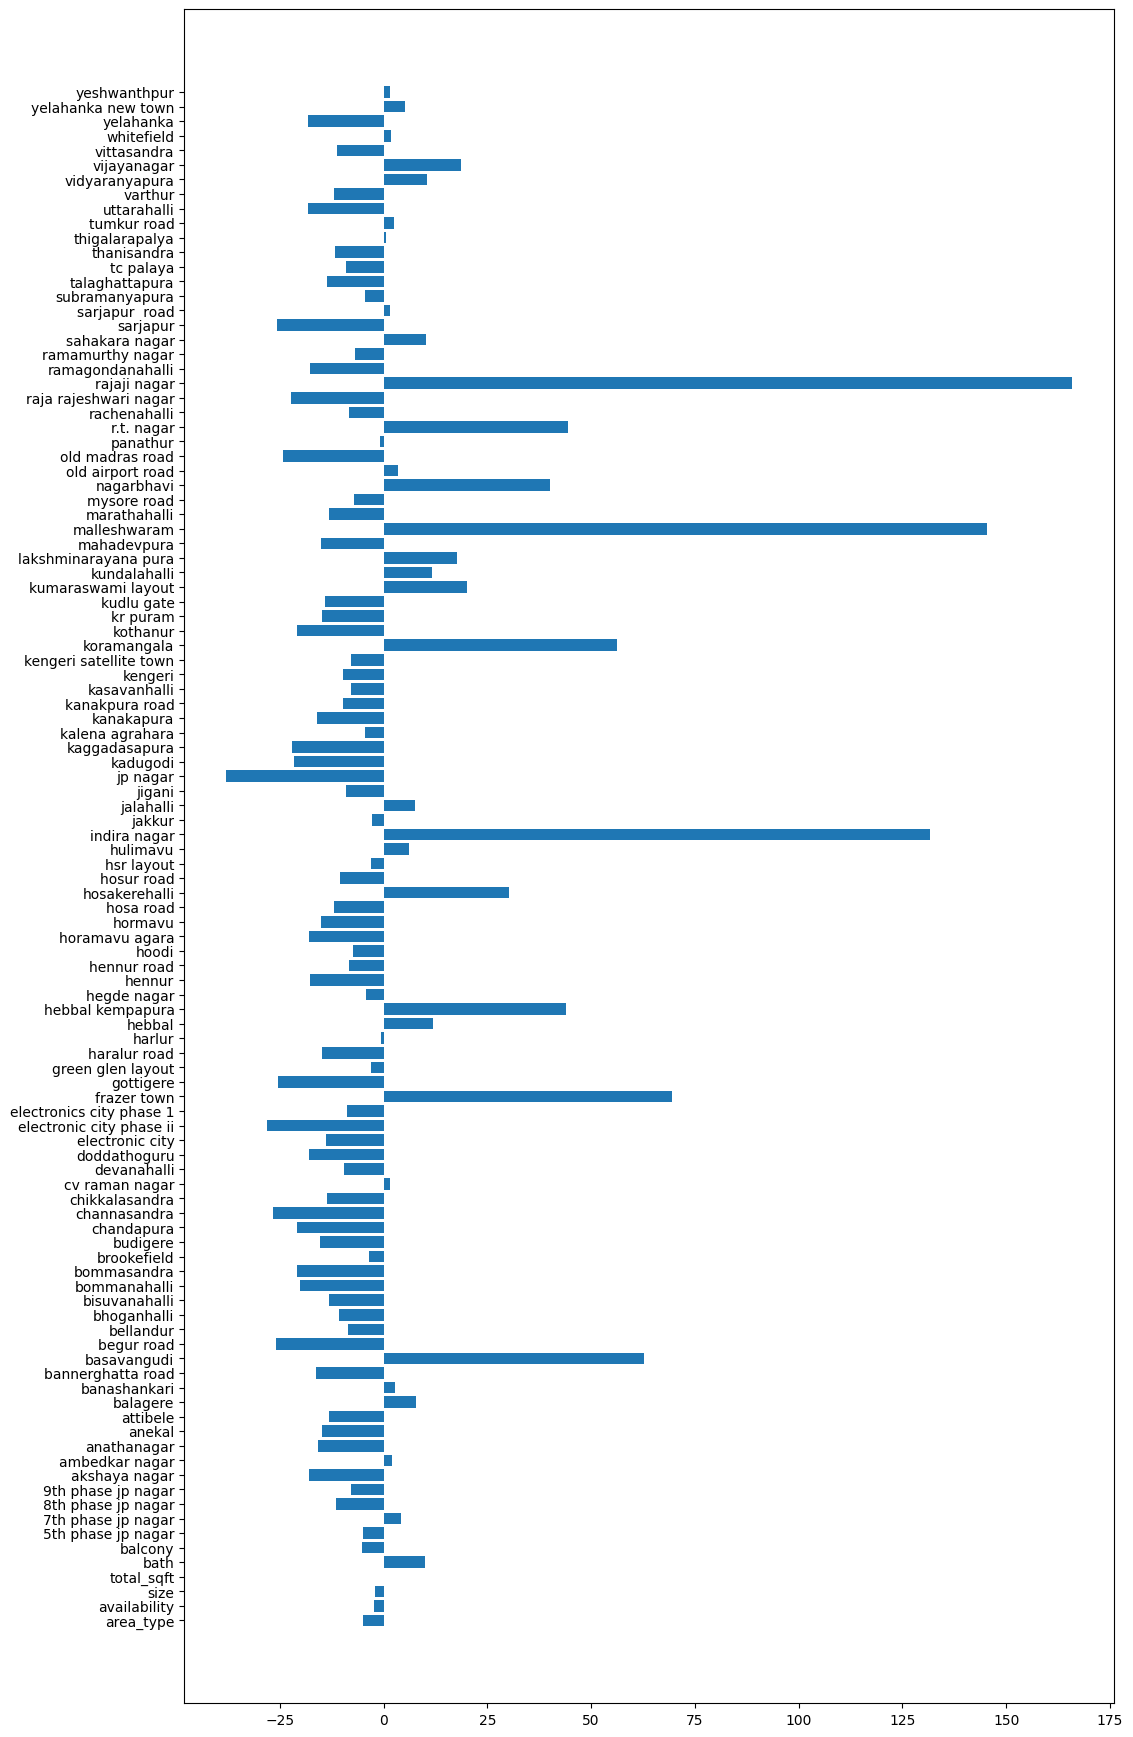

In [ ]:
plt.figure(figsize=(12,22))
plt.barh(xtrain.columns , lmodel.coef_)
plt.show()

In [ ]:
#Normalisation

df15 = df14.copy()
df15.head()

,area_type,availability,size,total_sqft,bath,balcony,price,5th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,tumkur road,uttarahalli,varthur,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelahanka,yelahanka new town,yeshwanthpur
0,0,0,3,1950.0,4.0,2.0,46.800,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,5,3752.5,6.0,1.0,177.115,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,5,5000.0,6.0,1.0,400.000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,3,1800.0,4.0,2.0,42.300,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3,1800.0,4.0,2.0,34.185,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df15['total_sqft'] = df15['total_sqft']/df15['total_sqft'].max()
df15['size'] = df15['size']/df15['size'].max()
df15['bath'] = df15['bath']/df15['bath'].max()
df15['balcony'] = df15['balcony']/df15['balcony'].max()

In [ ]:
df15.head()

,area_type,availability,size,total_sqft,bath,balcony,price,5th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,tumkur road,uttarahalli,varthur,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelahanka,yelahanka new town,yeshwanthpur
0,0,0,0.428571,0.097500,0.50,0.666667,46.800,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0.714286,0.187625,0.75,0.333333,177.115,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0.714286,0.250000,0.75,0.333333,400.000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0.428571,0.090000,0.50,0.666667,42.300,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0.428571,0.090000,0.50,0.666667,34.185,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df15.drop('price' , axis='columns')
Y = df15['price']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=0)

from sklearn.linear_model import LinearRegression
lmodel1 = LinearRegression()

lmodel1.fit(xtrain,ytrain)

ytrain_pred = lmodel1.predict(xtrain)
ytest_pred = lmodel1.predict(xtest)

mse_train = ((ytrain - ytrain_pred)**2).mean()
mse_test = ((ytest - ytest_pred)**2).mean()

print(mse_train , mse_test)

mae_train = (abs(ytrain - ytrain_pred)).mean()
mae_test = (abs(ytest - ytest_pred)).mean()

print(mae_train , mae_test)

2867.893678742883 1310.0672324556083
23.831404924031094 22.546411499157852


<Axes: >

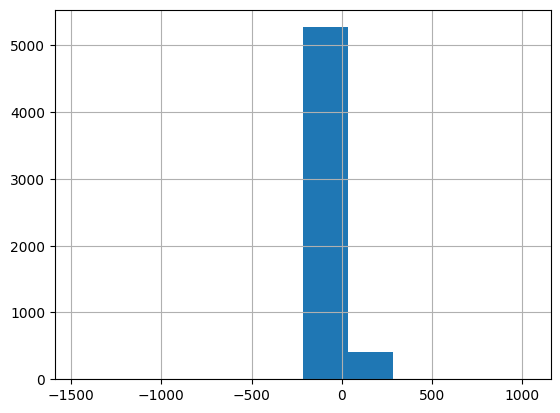

In [ ]:
diff_train = ytrain - ytrain_pred
diff_train.hist()

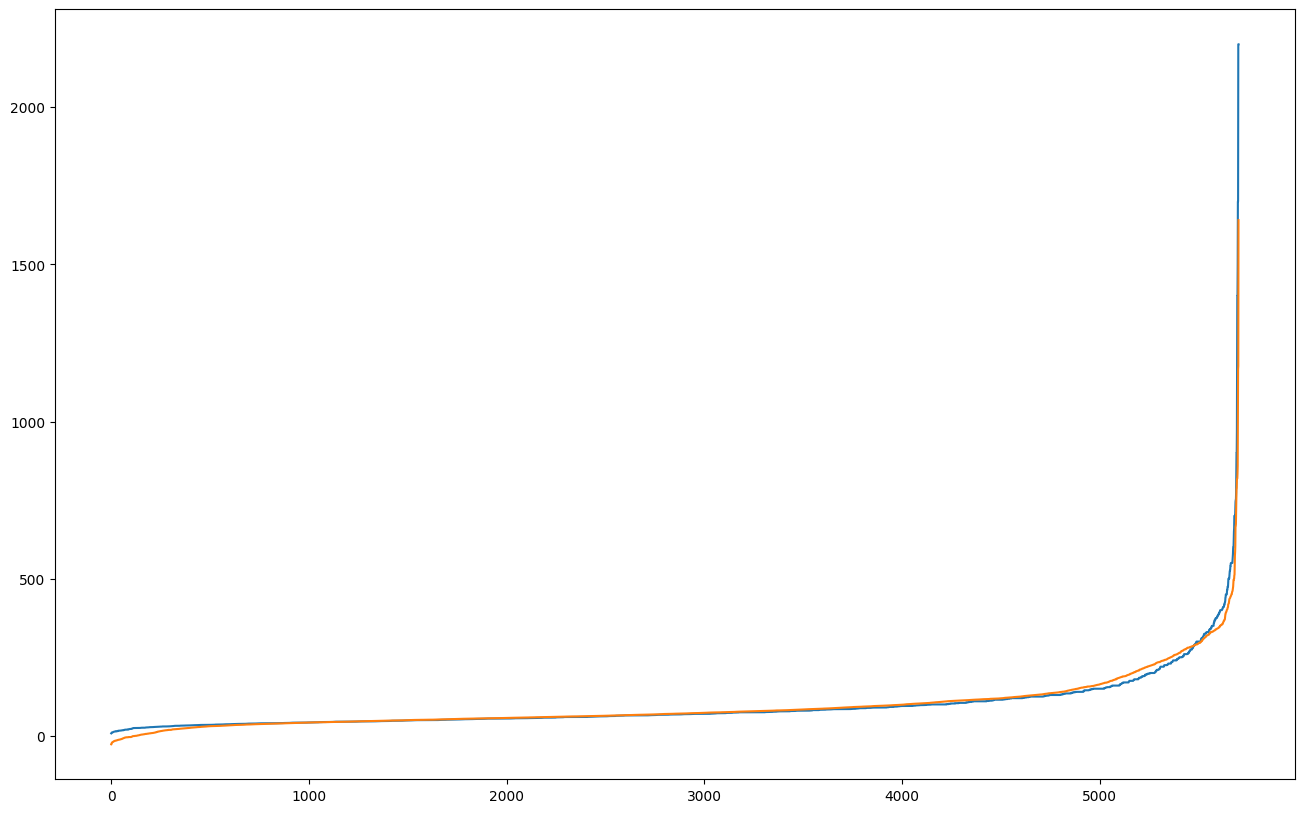

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

plt.plot(range(len(ytrain)) , ytrain.sort_values())

plt.plot(range(len(ytrain)) , pd.DataFrame(ytrain_pred)[0].sort_values())

plt.show()

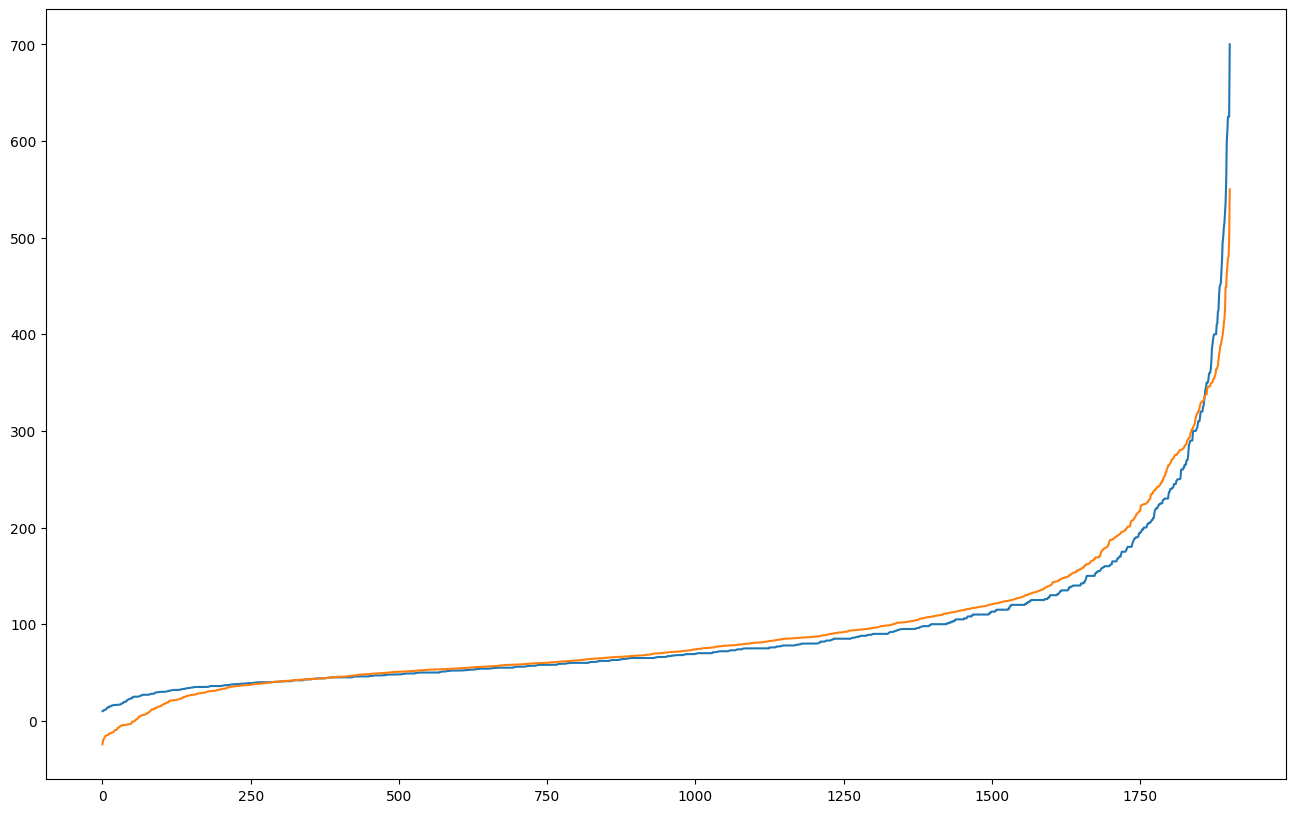

In [ ]:
plt.figure(figsize=(16,10))

plt.plot(range(len(ytest)) , ytest.sort_values())

plt.plot(range(len(ytest)) , pd.DataFrame(ytest_pred)[0].sort_values())

plt.show()

In [ ]:
np.hstack((ytest.values.reshape(-1,1) , ytest_pred.reshape(-1,1)))[0:20 , :]

array([[219.        , 178.23225082],
       [ 15.135     ,  -9.80589769],
       [ 39.73      ,  38.21226642],
       [ 52.66      ,  58.150026  ],
       [115.        , 125.68871924],
       [204.        , 215.89848311],
       [ 77.68      ,  90.71425745],
       [100.        , 180.12931982],
       [142.        , 156.84258677],
       [110.        , 224.80366279],
       [ 72.        ,  63.91010978],
       [ 65.4       ,  51.44006274],
       [ 36.23      ,   1.19465147],
       [160.        , 169.02426513],
       [ 43.        ,  58.47640865],
       [131.        , 105.90623359],
       [230.        , 124.4613133 ],
       [ 65.        ,  54.24317272],
       [ 35.        ,  58.94713962],
       [ 27.98      ,  15.05170237]])

In [ ]:
lmodel.coef_

array([-4.99350113e+00, -2.23613694e+00, -2.18493456e+00,  8.51865620e-02,
        1.00433674e+01, -5.15223121e+00, -5.08577537e+00,  4.28993930e+00,
       -1.14236101e+01, -7.81826637e+00, -1.79296863e+01,  1.98915730e+00,
       -1.58834680e+01, -1.48887618e+01, -1.31636976e+01,  7.80859931e+00,
        2.65572982e+00, -1.62494763e+01,  6.26849423e+01, -2.59292574e+01,
       -8.67597465e+00, -1.08214021e+01, -1.30957496e+01, -2.01210335e+01,
       -2.09214296e+01, -3.57393405e+00, -1.52509698e+01, -2.07957504e+01,
       -2.65475378e+01, -1.35624671e+01,  1.54386952e+00, -9.57374239e+00,
       -1.80672600e+01, -1.38774923e+01, -2.79892593e+01, -8.79582241e+00,
        6.95752000e+01, -2.53485908e+01, -3.11780259e+00, -1.47282578e+01,
       -6.11852579e-01,  1.18718074e+01,  4.38746230e+01, -4.15822133e+00,
       -1.77819031e+01, -8.37467747e+00, -7.43677409e+00, -1.79304694e+01,
       -1.51208539e+01, -1.20511736e+01,  3.01857270e+01, -1.04179025e+01,
       -2.92502549e+00,  

In [ ]:
xtrain.columns

Index(['area_type', 'availability', 'size', 'total_sqft', 'bath', 'balcony',
       '5th phase jp nagar', '7th phase jp nagar', '8th phase jp nagar',
       '9th phase jp nagar',
       ...
       'tumkur road', 'uttarahalli', 'varthur', 'vidyaranyapura',
       'vijayanagar', 'vittasandra', 'whitefield', 'yelahanka',
       'yelahanka new town', 'yeshwanthpur'],
      dtype='object', length=106)

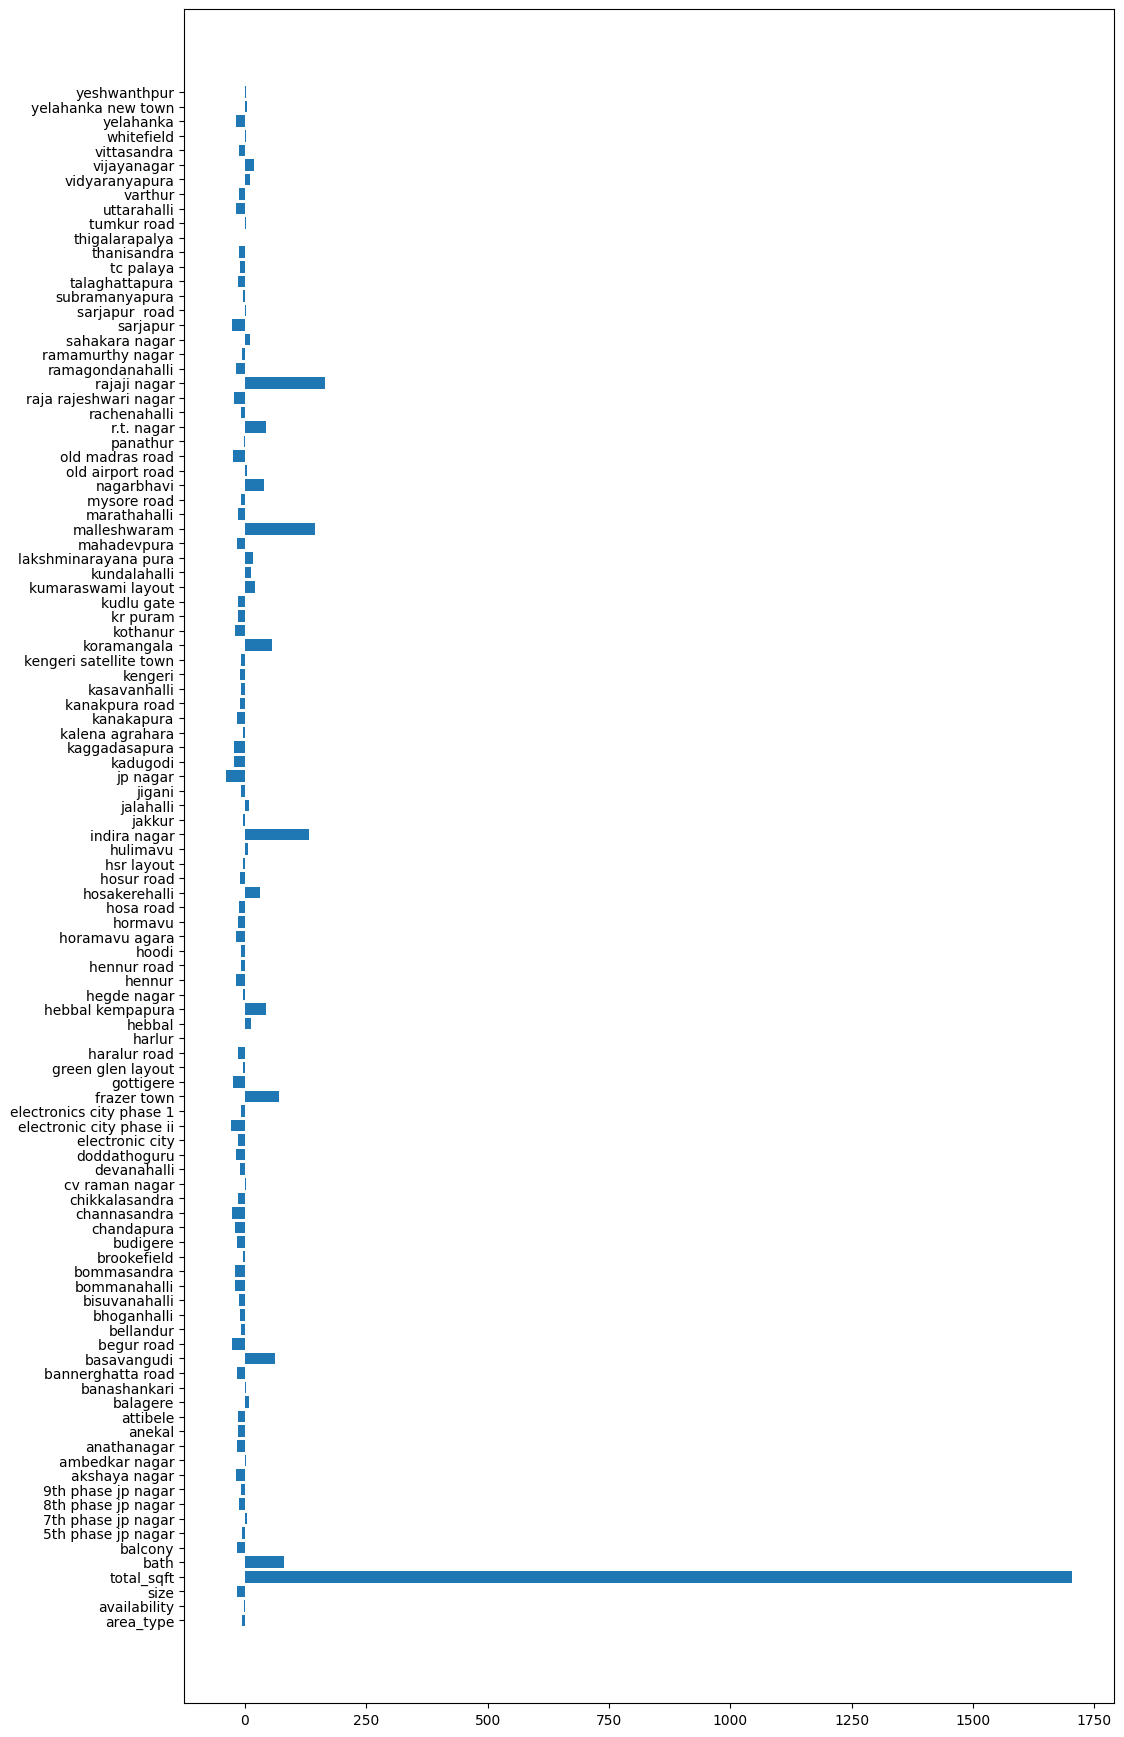

In [ ]:
plt.figure(figsize=(12,22))
plt.barh(xtrain.columns , lmodel1.coef_)
plt.show()

#Predictions

In [ ]:
df9.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Other Area Type,Under Construction,devanahalli,3,1950.0,4.0,2.0,46.800
1,Other Area Type,Under Construction,devanahalli,5,3752.5,6.0,1.0,177.115
2,Other Area Type,Under Construction,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,Other Area Type,Under Construction,mysore road,3,1800.0,4.0,2.0,42.300
4,Other Area Type,Under Construction,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
df13.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,0,devanahalli,3,1950.0,4.0,2.0,46.800
1,0,0,devanahalli,5,3752.5,6.0,1.0,177.115
2,0,0,kasavanhalli,5,5000.0,6.0,1.0,400.000
3,0,0,mysore road,3,1800.0,4.0,2.0,42.300
4,0,0,sarjapur road,3,1800.0,4.0,2.0,34.185


In [ ]:
df14.head()

,area_type,availability,size,total_sqft,bath,balcony,price,5th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,tumkur road,uttarahalli,varthur,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelahanka,yelahanka new town,yeshwanthpur
0,0,0,3,1950.0,4.0,2.0,46.800,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,5,3752.5,6.0,1.0,177.115,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,5,5000.0,6.0,1.0,400.000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,3,1800.0,4.0,2.0,42.300,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3,1800.0,4.0,2.0,34.185,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df9['area_type'].unique())
print(df9['availability'].unique())
print(df9['location'].unique())

['Other Area Type' 'Super built-up  Area']
['Under Construction' 'Ready To Move']
['devanahalli' 'kasavanhalli' 'mysore road' 'sarjapur  road' 'whitefield'
 'bhoganhalli' 'bommanahalli' 'chandapura' 'electronic city phase ii'
 'electronics city phase 1' 'haralur road' 'hebbal' 'hennur' 'hennur road'
 'jakkur' 'jigani' 'jp nagar' 'kanakpura road' 'kr puram' 'kudlu gate'
 'malleshwaram' 'old madras road' 'rajaji nagar' 'sarjapur' 'thanisandra'
 'yelahanka' '5th phase jp nagar' '7th phase jp nagar'
 '8th phase jp nagar' '9th phase jp nagar' 'akshaya nagar' 'anekal'
 'attibele' 'balagere' 'banashankari' 'bannerghatta road' 'basavangudi'
 'begur road' 'bellandur' 'bisuvanahalli' 'bommasandra' 'brookefield'
 'budigere' 'channasandra' 'chikkalasandra' 'cv raman nagar'
 'doddathoguru' 'electronic city' 'frazer town' 'gottigere'
 'green glen layout' 'harlur' 'hebbal kempapura' 'hegde nagar' 'hoodi'
 'horamavu agara' 'hormavu' 'hosa road' 'hosakerehalli' 'hosur road'
 'hsr layout' 'hulimavu' 'in

In [ ]:
at = 'Super built-up  Area'
av = 'Ready To Move'
loc = 'indira nagar'

size = 3
total_sqft = 900
bath = 2
balcony = 2

In [ ]:
len(xtrain.columns)

106

In [ ]:
xtrain.columns

Index(['area_type', 'availability', 'size', 'total_sqft', 'bath', 'balcony',
       '5th phase jp nagar', '7th phase jp nagar', '8th phase jp nagar',
       '9th phase jp nagar',
       ...
       'tumkur road', 'uttarahalli', 'varthur', 'vidyaranyapura',
       'vijayanagar', 'vittasandra', 'whitefield', 'yelahanka',
       'yelahanka new town', 'yeshwanthpur'],
      dtype='object', length=106)

In [ ]:
input = np.zeros(len(xtrain.columns))
input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:
input[0] = np.where(df9['area_type'].unique() == at)[0][0]

In [ ]:
input[1] = np.where(df9['availability'].unique() == av)[0][0]

In [ ]:
input[2] = size
input[3] = total_sqft
input[4] = bath
input[5] = balcony

In [ ]:
np.where(xtrain.columns == loc)[0][0]

np.int64(54)

In [ ]:
input

array([  1.,   1.,   3., 900.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [ ]:
print(lmodel.predict([input]))

[36.32171623]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
xtrain['area_type'].unique() == 'Super built-up  Area'

array([False, False])

In [ ]:
k = ['Other Area Type' , 'Super built-up  Area']
k.index('Super built-up  Area')

1

#DATA PREDICTION

In [ ]:
def predict_my_price(at,av,size,tsq,bath,bal,loc):

  input = np.zeros(len(xtrain.columns))

  area_type = ['Other Area Type' , 'Super built-up  Area']
  availability  = ['Under Construction' , 'Ready To Move']

  input[0] = area_type.index(at)
  input[1] = availability.index(av)
  input[2] = size
  input[3] = tsq
  input[4] = bath
  input[5] = bal
  input[np.where(xtrain.columns == loc)[0][0]] = 1

  return lmodel.predict([input])

In [ ]:
print(predict_my_price('Super built-up  Area','Ready To Move',2,2050,2,3,'kumaraswami layout'))

[151.52180694]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
